In [ ]:
# Import Libraries
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

# We are using whitegrid style for our seaborn plots. This is like the most basic one
sns.set_style(style = 'whitegrid')
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df2 = pd.read_csv(io.BytesIO(uploaded['bank.csv']), header=0, sep=';')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
yLabel = "termdep"

df2.rename(columns = {'y':yLabel}, inplace = True)

yOrigin = pd.Series(df2.loc[:,yLabel], name=yLabel)
yOrigin

0       no
1       no
2       no
3       no
4       no
        ..
4516    no
4517    no
4518    no
4519    no
4520    no
Name: termdep, Length: 4521, dtype: object

In [ ]:
#Get first fifteen
xNumOfColumns = 15
xOrigin = df2.iloc[: , :df2.shape[1] - 1]
xOrigin.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown


In [ ]:
#Get all categorical data from independent variables
ds_cat = xOrigin.select_dtypes(include = 'object').copy()
ds_cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,unemployed,married,primary,no,no,no,cellular,oct,unknown
1,services,married,secondary,no,yes,yes,cellular,may,failure
2,management,single,tertiary,no,yes,no,cellular,apr,failure
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown


In [ ]:
jobEducationCT = pd.crosstab([
    ds_cat['job'], 
    ds_cat['education']], yOrigin, margins = False)

jobCT = pd.crosstab(ds_cat['job'], yOrigin, margins=False)
eduCT = pd.crosstab(ds_cat['education'], yOrigin, margins=False)

In [ ]:
#stats.chi2_contingency(jobEducationCT)
jobEducationCT

y                         no  yes
job           education          
admin.        primary     16    1
              secondary  345   48
              tertiary    44    7
              unknown     15    2
blue-collar   primary    353   16
              secondary  475   49
              tertiary    11    1
              unknown     38    3
entrepreneur  primary     23    3
              secondary   51    7
              tertiary    69    4
              unknown     10    1
housemaid     primary     49    8
              secondary   25    3
              tertiary    19    3
              unknown      5    0
management    primary     34    5
              secondary  107    9
              tertiary   674  113
              unknown     23    4
retired       primary     64   16
              secondary   83   22
              tertiary    18   13
              unknown     11    3
self-employed primary     13    2
              secondary   74    2
              tertiary    73   15
              unknown      3    1
services      primary     22    3
              secondary  331   32
              tertiary    14    2
              unknown     12    1
student       primary      0    2
              secondary   37   10
              tertiary    12    7
              unknown     16    0
technician    primary     12    3
              secondary  465   55
              tertiary   187   24
              unknown     21    1
unemployed    primary     23    3
              secondary   61    7
              tertiary    29    3
              unknown      2    0
unknown       primary      5    2
              secondary    7    1
              tertiary     7    1
              unknown     12    3

In [ ]:
#stats.chi2_contingency(jobCT)
jobCT

y,no,yes
job,,
admin.,420,58
blue-collar,877,69
entrepreneur,153,15
housemaid,98,14
management,838,131
retired,176,54
self-employed,163,20
services,379,38
student,65,19


In [ ]:
#stats.chi2_contingency(eduCT)
eduCT

y,no,yes
education,,
primary,614,64
secondary,2061,245
tertiary,1157,193
unknown,168,19


In [ ]:
#Keep going with this articles
#
#https://www.kaggle.com/code/nextbigwhat/eda-for-categorical-variables-a-beginner-s-way (This trial isn't enough, since use y-target as continous variable)
#https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
#https://www.kdnuggets.com/2021/03/11-essential-code-blocks-exploratory-data-analysis.html
#https://www.sharpsightlabs.com/blog/scikit-train_test_split/
#https://www.sharpsightlabs.com/blog/supervised-vs-unsupervised-learning/

In [ ]:
fullCatVariables = df2.select_dtypes(include = 'object').copy()
columns = list(fullCatVariables)
columnUniqueValues = {}

In [ ]:
#Iterate by rows
#for row in ds_cat.iterrows():
#   doSomething(row['column-name'])

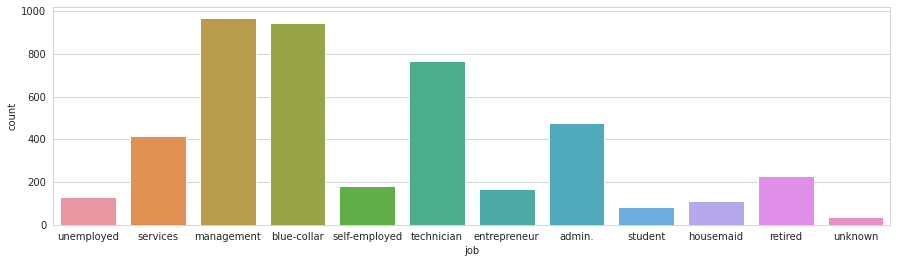

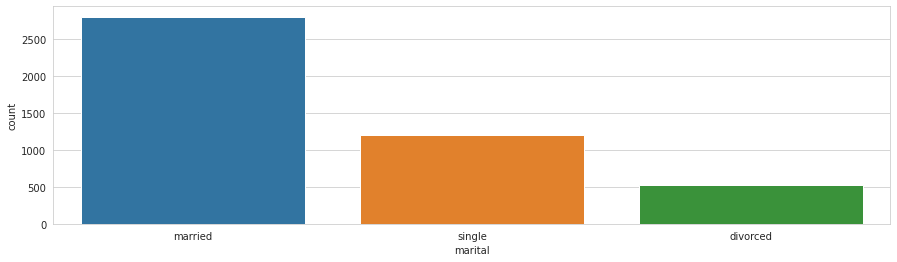

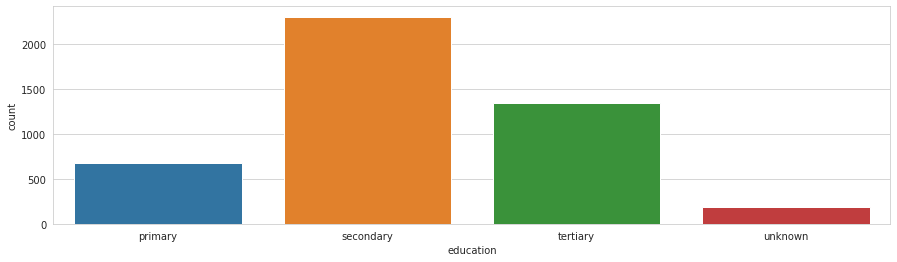

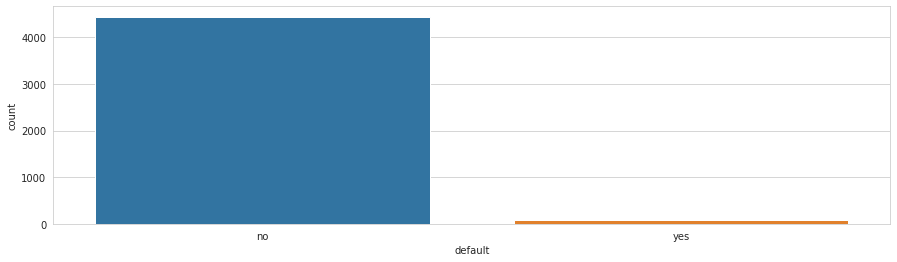

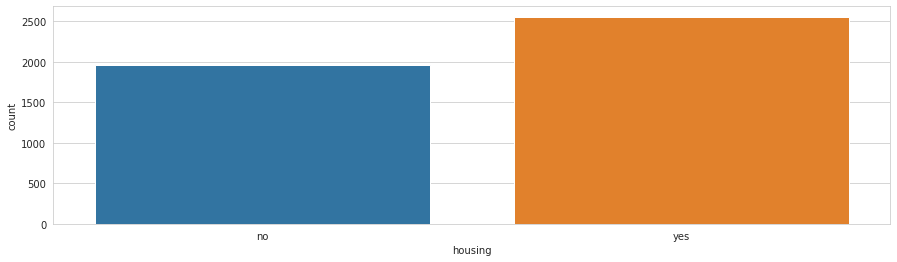

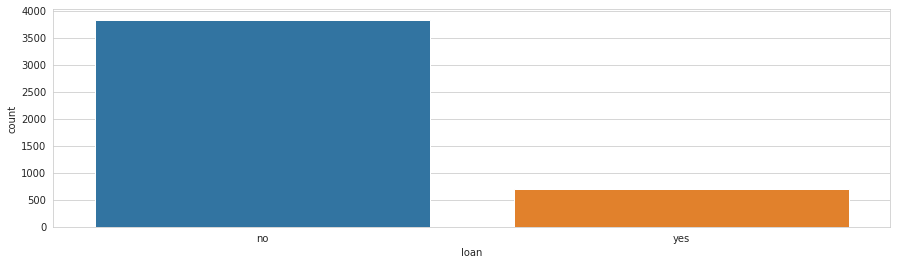

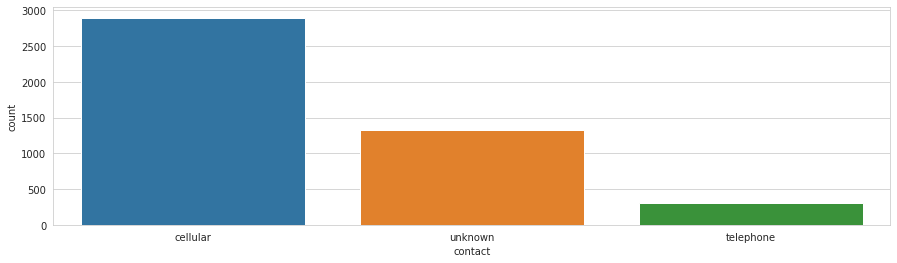

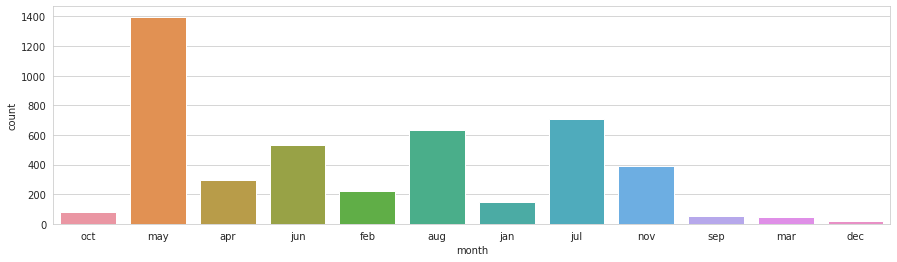

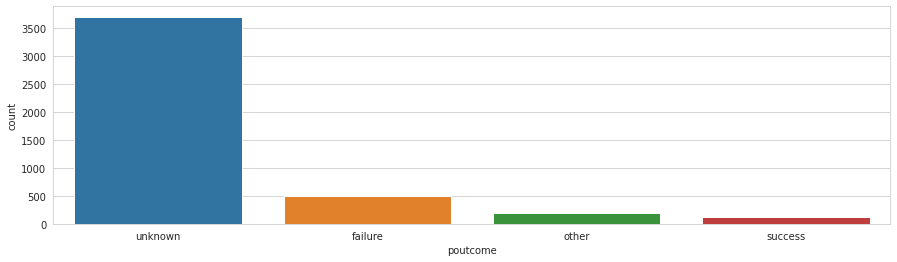

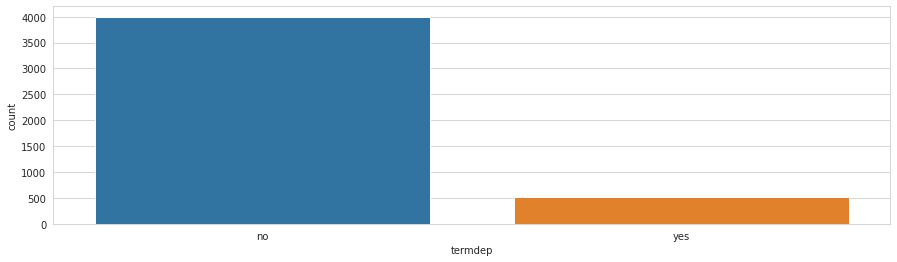

In [ ]:
#Iterate by columns

for i in columns:
  values = fullCatVariables[i].unique();
  plt.figure(f'values in {i} column', figsize=(15,4))
  sns.countplot(data = fullCatVariables, x = i)
  #plt.figure(f'{i} Box plot related with {yLabel}')
  #sns.boxplot(data = boxPlotDf, x=i, y=yLabel)
#  columnUniqueValues.update({
#      i: {
#          "values": values,
#          "values-count": len(values),
#          },
#      })